# Bias Versus Variance: Sesgo versus Varianza
Se trata de entender mejor el error.

* **sesgo**: Es el error global. Que tanto se aleja la media de la solucion real (la etiqueta). Es el responsable de **underfitting** (sub-ajuste).

* **varianza**: El error debido a la varianza estad'istica. Esto ocurre cuando tratamos de ajustar los datos muy cerca a una solucion estimada. El ajuste muy cercano puede hacer que sigamos el ruido y crea un estado de **sobreajuste**.

Vamos a ver ejemplos graficos de estos conceptos.

* **ruido**: Siempre existira. Existe el ruido en los datos por fenomenos ambientales, ruidos numericos, o agragados.

Vamos a ser un poco cuantitativos y luego miramos unas graficas que nos ayuden a entender mejor el fenomenmo.

Recuerden la funcion de costo para la regresion lineal.

$$J(\theta) = \frac{1}{2m} \left [ \sum_{i=1}^m ( h(\theta, x^{(i)}) - y^{(i)})^2  + \lambda \sum_{i=1}^n \theta_i^2  \right ] $$

Es intersante que el primer termino

$$MSE =  \frac{1}{m} \sum_{i=1}^m ( h(\theta, x^{(i)}) - y^{(i)})^2 $$
[MSE from wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error).

El MSE esta muy relacionado con la funcion de costo (menos la regularizacion y un factor 1/2 que no importa).

El modelo que vamos a usar es

$$y = f(x) + \epsilon $$
donde $y$ es la etiqueta, $f(x)$ es el modelo, $x \in \mathrm{R}^n$, $\epsilon$ es el ruido, que lo asumimos con media $\mu_\epsilon=0$ y varianza $\sigma^2$.

El error que queremos es

\begin{eqnarray}
\mathbb{E} [ (y -h(x))^2] &=& \mathbb{E}[ f(x) + \epsilon - h(x))^2] \\
&=& \mathbb{E}[ (f(x) - h(x))^2 ] + \mathbb{E}(\epsilon^2)  \\
&=& \mathbb{E} [ (h(x) - \mathbb{E}[ h(x)] + \mathbb{E}[h(x)] - f(x))^2)] +
\sigma^2  \\
&=& \mathbb{E}[ ( h(x) - \mathbb{E}[h(x))])^2) + ( \mathbb{E}[h(x)] - f(x)])^2 +
\sigma^2  
\end{eqnarray}
De la ultima ecuacion el primer termino es la varianza

$$Varianza = \mathbb{E}[ ( h(x) - \mathbb{E}[h(x))])^2) $$
De la ultima ecuacion el segundo termino es el sesgo al cuadrado

$$sesgo^2 =  ( \mathbb{E}[h(x)] - f(x)])^2$$

De forma que encontramos que

$$\mathbb{E} [ (y - h(x))^2] = sesgo^2(h(x)) +  var[h(x)] + \sigma^2  $$

Vamos a ver interpretaciones de este resultado.

La Figura 3.78 muestra el " ojo del Buey"


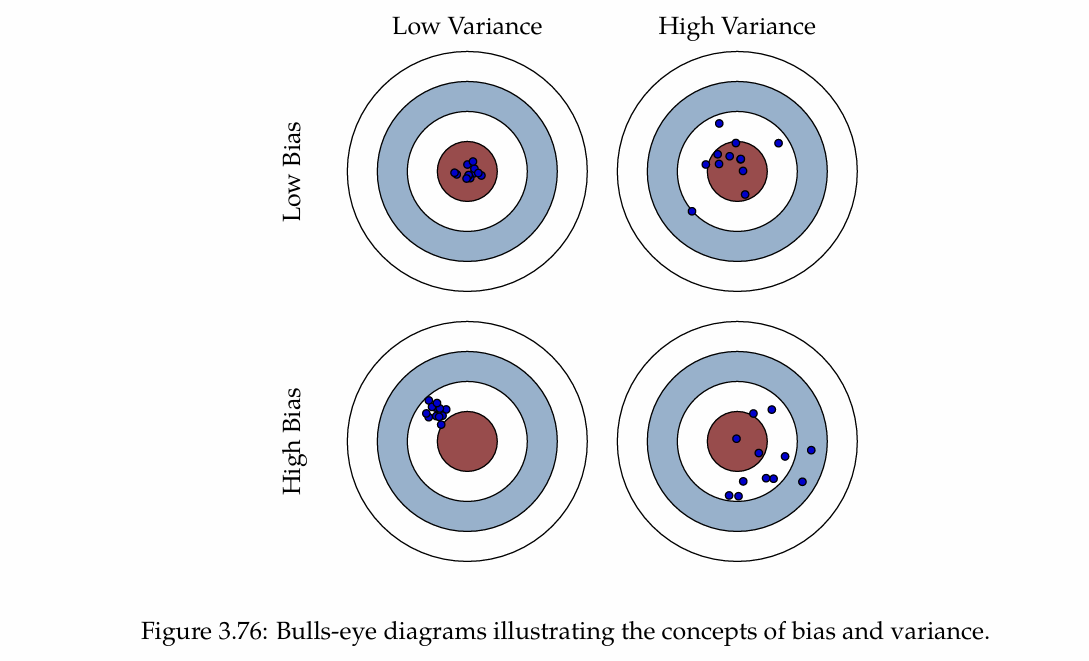

La Figura 3.79 muestra otro aspecto de los conceptos de sesgo vs varianza.


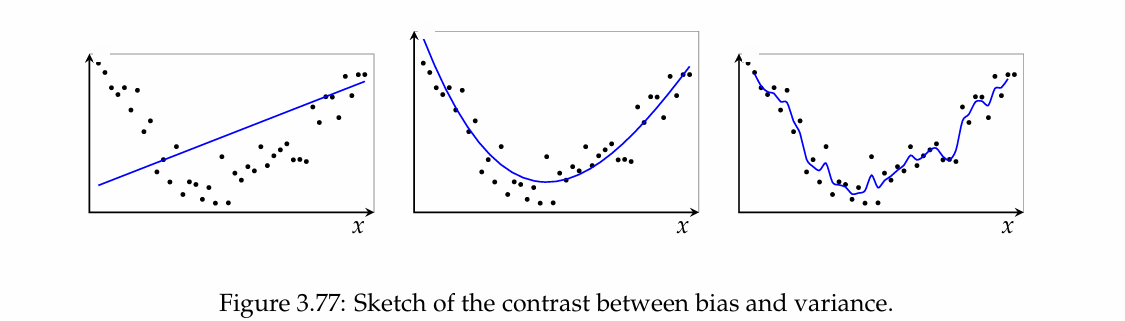

Un ultimo diagrama est'a en la Figura 3.80 (enseguida). Donde vemos el compromiso (trade off) entre Bias y Varianza.


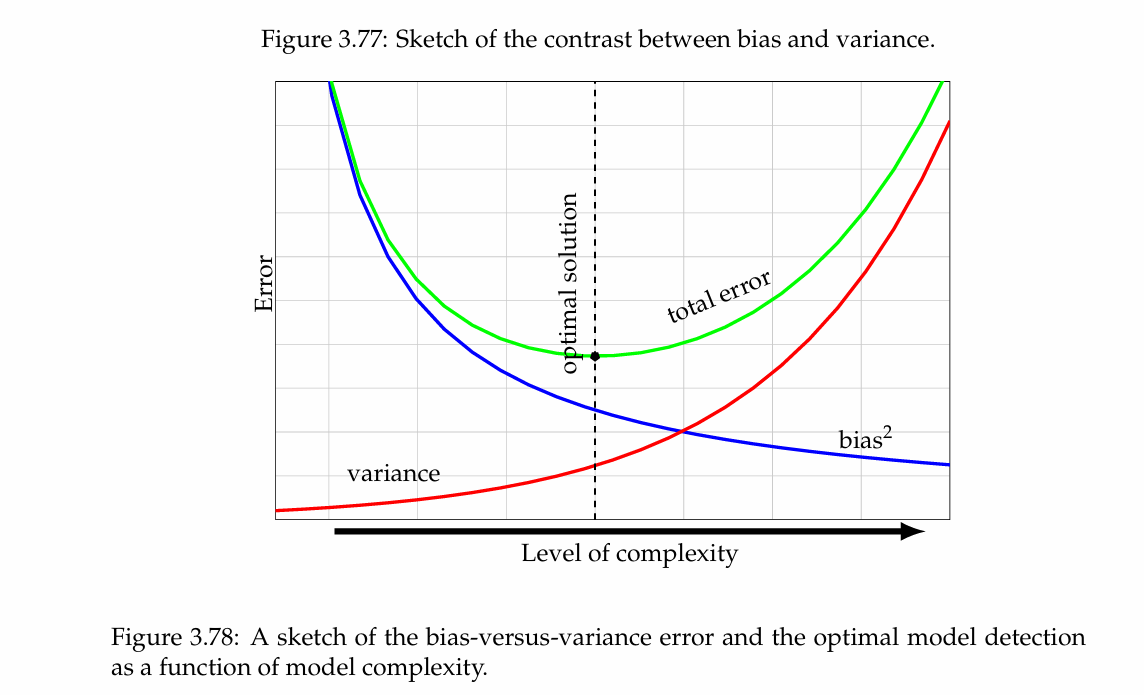

# Curvas de aprendizaje:
Nos basamos en la Figura 3.81


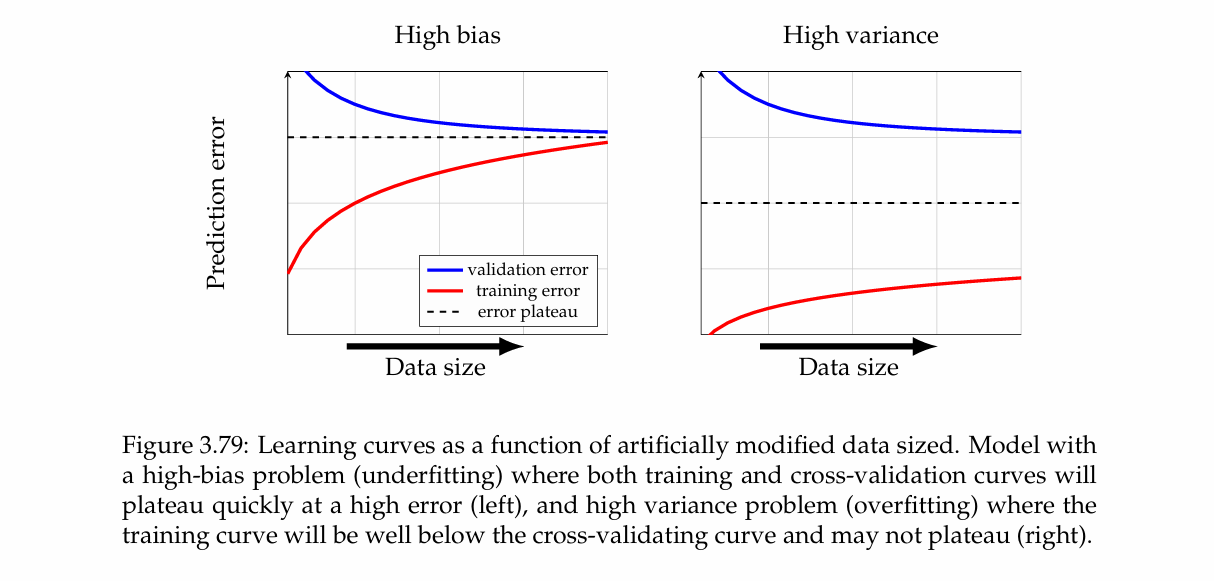

En las curvas de la Figura 3.79 las iunterpretamos basadas en lo siguiente.

* **Sesgo grande** (high bias). Esto est'a asociado al subajuste. El eje x indica la cantidad datos. La curva azul indica error de validaci'on y la roja error de entrenamiento. Cuando hay pocos datos el error de entrenamiento es pequenho y crece con el numero de datos. Al contrario el error de validacion es grande y disminuye con el numero de datos. Un sintoma de **underfitting** es que los dos errores tienen a una asintota comun, alta (high bias).

* **varianza alta** : Aunque el bias se pequenho las curvas se alejan entre si. Esto es sintoma de **overfitting**.

Debe existir en los paquetes de IA en python herramientas para crear estas graficas (toca investigar).

### Como arreglamos estos problemas de overfitting y underfitting.

* Para arreglar problemas de varianza alta (sobre-ajuste)
    * Incrementar muestras. Mas datos.
    * Reducir el numero de parametros: Por ejemplo en regresion polinomica, reducir el grado del polinomio. En redes neuronales. Reducir el numero de capas o de nodos. Vamos a estudiar PCA (Principal Component Analysis). Esto sirve para reducir dimensiones.

    * Incrementar el par'ametro de regularizacion $\lambda$.

* Para arreglar problemas de "bias" (sub-ajuste).
    * Incrementar parametros. Polinomios de mas alto orden (en regresion polinomica), incrementar nodos o capas en un red neuronal.

    * Reducir el tamano de $\lambda$ (regularizacion).





# Support Vector Machines (SVM: Maquinas de soporte Vectorial).
## Historia:
Vladimir Vapnik (Ruso) en los 1960s introdujo el metodo de SVM pero no "le pararon bolas".  Vladimir emigro hacia los EEUU en 1992, a trabajar con los laboratorios Bell. Vladimir  sometio tres articulos a la prestigiosa revista
[Conference on Neural Information Processing Systems](https://en.wikipedia.org/wiki/Conference_on_Neural_Information_Processing_Systems). Lamentablemente los tres articulos fueron rechazados. En una apuesta, en una caferia, con un colega, aposto a que su tecnica era mejor que las redes neuronales para interpretar manuscritos (hand written characters). Gano la apuesta y comenzo a tener mas prestigio. Luego con la introduccion del **kernel tricks** por Isabel Guyon, se populariz'o mas el SVM y hoy SVM es una tecnica muy reconocida y usada en el medio.

### Comparaci'on del SVM con la regresion lineal.

En la regresion lineal (pensemos en $\mathbb{R}^2$).

La funci'on de costo donde $\theta=(a,b)$, intercepto/pendiente
$$ J(a,b) = \frac{1}{2m} \sum_{i=1}^m [ y_i - (a x_i + b) ]^2$$

En regresion lineal la funcion de costo considera distancias verticales.
En SVM la funcion de costo considera distancias normales. Ver dibujo a mano alzada en clase.  El objeto es **minimizar** $J(a,b)$.

En SVM, al contrario  queremos  maximizar

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i, y_i), L(a,b)] $$
donde $x_i,y_i$, $i=1,2, \cdots, m$ son las coordenadas de los puntos.

### Aplicaciones:
Cualquier problema que requiera clasificacion.
Nota: Aunque aca solo usamos 2 clases, se puede generalizar a mas clases usando la tecnica del uno-contra-el-resto.

### Hoja de ruta:
* Resolver el problema de separacion lineal. Encontrar la funcion de costo basado en la geometria donde toca encontrar un hiperplano separador (frontera de separacion).

* Pensar en que pasa con los "outliers" (puntos que estan perdidos).

* Pensar en el problema separacion no lineal.

* Kernels

* Resolver el  problema con multiplicadores de Lagrange


* Kernel trick

Nos vemos a las 10:40.

## Hiperplano de separaci'on y vectores de soporte.
Este tema lo vamos a introducir con una graficas.
Observe la Figura 3.82

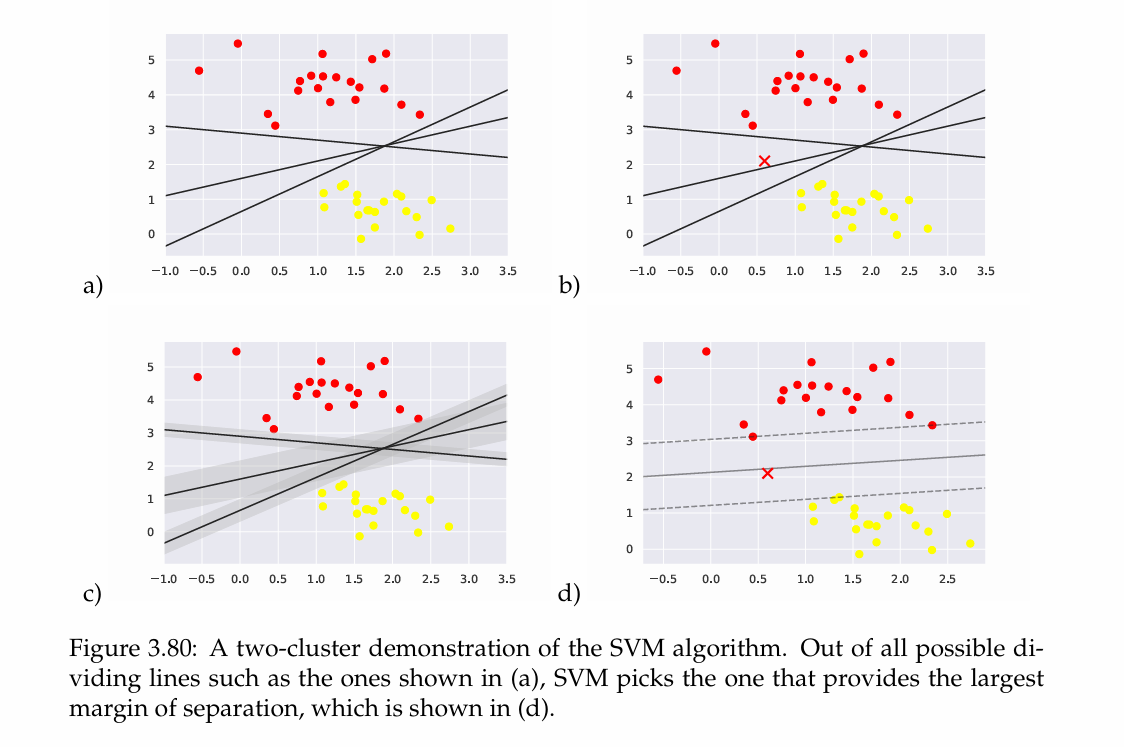

La Figura 3.83 ilustra como cuando insertamos mas puntos, los vectores de soporte no se alteran ( a no ser que los puntos esten dentro el margen central).



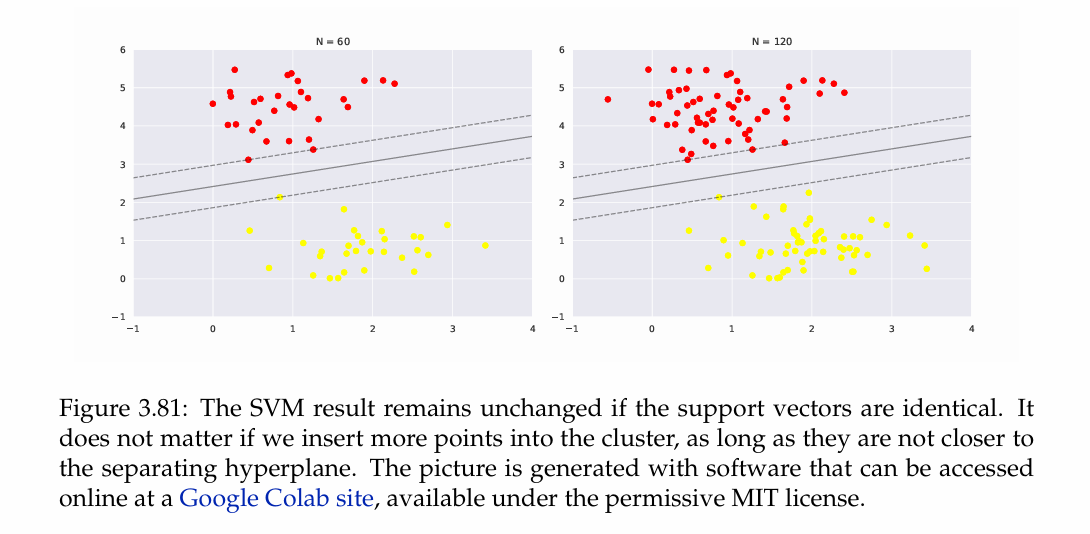

### Derivacion la funcion de costo del SVM
Asumimos los puntos $x^{(1)}, x^{(2)}, \cdots, x^{(m)} $
con etiquetas $y^{(1)}, y^{(2)}, \cdots, y^{(m)} $
Por ahora los $y^{(i)}$ son **binarios**. Es decir que las etiquetas de los $y^{(i)}$ son $\oplus=1$, $\ominus=-1$.

La Figura 3.84 ilustra la situacion.

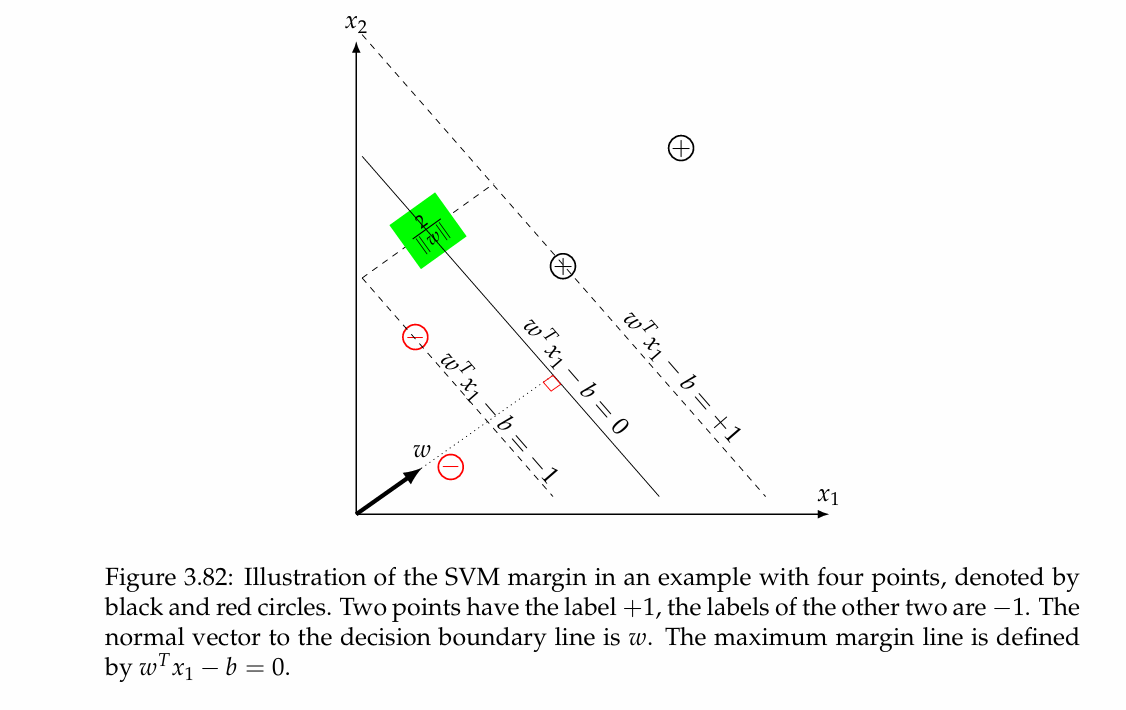

Consideremos el problema en $\mathbb{R}^2$

$$x_2 = a x_1 - b $$

Esto se puede escribir como

$$0 = a x_1 - x_2 - b $$

O de forma vectorial (matricial)

$$0 = \binom{a}{-1}^T \binom{x_1}{x_2} - b $$

en **general** en $\mathbb{R}^n$ el problema se escribe como

$$0 = w^T x - b $$
donde $w,x,b \in \mathbb{R}^n$

Este es un hiperplano.

El objeto es hallar $w, b$. $\theta=(w,b)$ y obener algo como en la Figura 3.87.

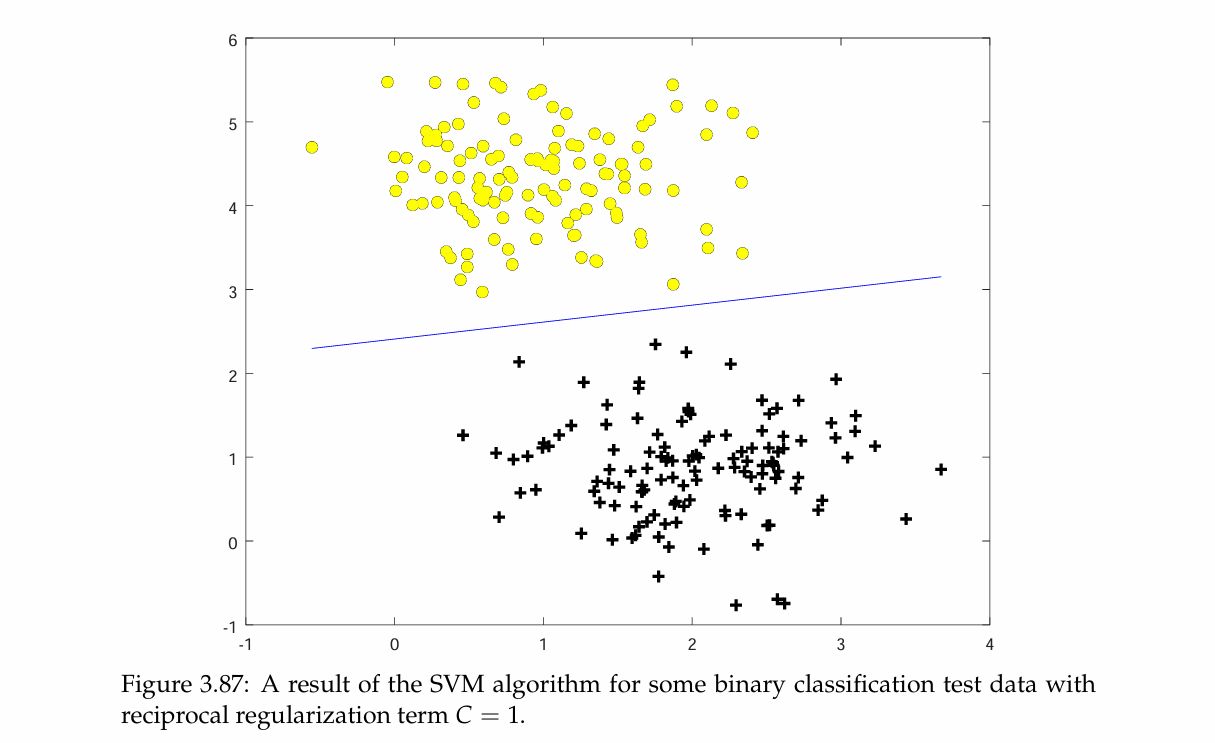

El objeto de SVM es encontrar ese plano (linea azul) separador. Es decir $w, b$.

Hay dos semi-espacios. Asumimos lo siguiente (ver Figura 3.82).

$$w^T x^{(i)} - b \ge 1 \quad , \quad y^{(i)} = \oplus 1   $$
o
$$w^T x^{(i)} - b < 1 \quad , \quad y^{(i)} = \ominus 1   $$

Llamemos $\delta$

$$\delta = w^T x - b $$
El hiperplano que divide los dos semi-espacioes (el hiperplano esta en $\mathbb{R}^{n-1}$ el espacio es $\mathbb{R}^n$)  tiene $\delta=0$

Los puntos estan a uno u otroa lado si

$$w^T x^{(i)} - b \ge 0  \quad , \quad \text{si} \quad y^{(i)} = 1 $$
$$w^T x^{(i)} - b < 0  \quad , \quad \text{si} \quad y^{(i)} = -1 $$

Los puntos para $\delta>0$ cumplen

$$w^T x^{(i)} - b = \delta \ge 0    \quad , \quad \text{si} \quad y^{(i)} = 1 $$
$$w^T x^{(i)} - b = -\delta <0    \quad , \quad \text{si} \quad y^{(i)} = -1 $$

Estas dos ecuaciones se poner en una sola

$$y^{(i)} ( w^T x^{(i)} - b) = \delta \tag{1}  $$

Tenemos entonces dos casos para cada punto $x$ en los datos
$$w^T x -  b = \pm \delta $$

Recuerden que lo queremos es maximizar el margen (ancho de carretera).
Por un ejercicio de una de las primeras tareas del algebra lineal.

$$\text{dos veces el ancho de una via} = \frac{2 \delta}{w}. $$

Lo que queremos es **maximizar** este ancho, sujeto a una restriccion

$$ y^{(i)}( w^T x^{(i)} - b) = 1$$
donde $\delta = 1$.

Por que puedo yo decir que $\delta = 1$?
Por que puedo hacer un cambio de variables en la Ecuacion (1)
$w \to w/\delta $, $b \to b/\delta$.

En vez de maximizar, estamos acostumbrados a **minimizar**. Entonces
invertimos la fraccion. Elevamos al cuadrado por que tambien estamos acostumbrados a funciones objetivo de tipo cuadrado.

Tenemos entonces el siguiente problema.

$$\min \frac{\|w\|^2}{2} \quad \text{sujeto a } \quad y^{(i)}(w^T x^{(i)} - b) \ge 1 $$



En la hoja de ruta mencionamos " outliers"  puntos que estan en el grupo equivocado (un pino en el bosque de Eucaliptus).

Para esto usamos
#### Regularizacion. (Lagrange Multipliers)

$$J(w,b) = \frac{\| w \|^2}{2} + C \sum_{i=1}^m 1 - y^{(i)}[ w^T x^{(i)} - b] $$

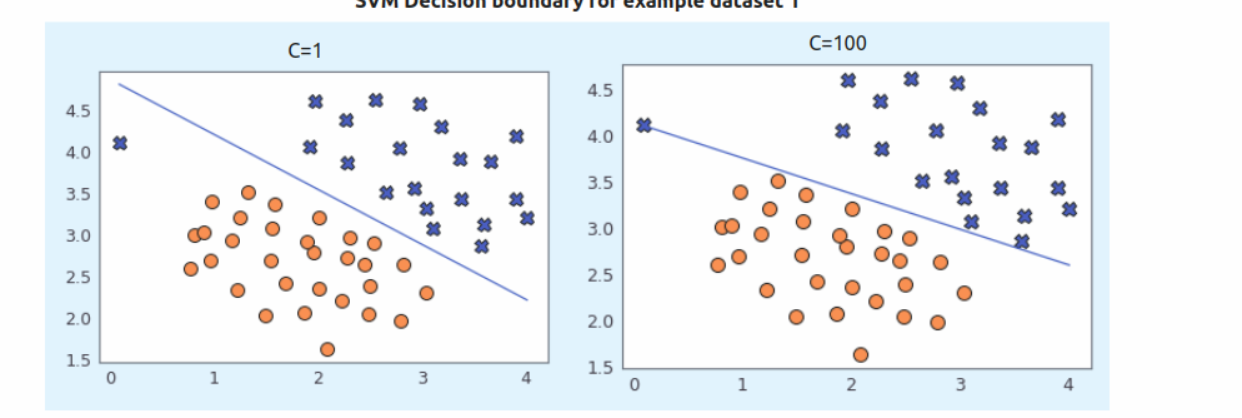

#### Que pasa cuando la separacion no es lineal

## Kernels.
Con mi estilo comenzamos con dimensiones bajas y luego las aumentamos.
Dimension 1, $\mathbb{R}$.  Observen la Figura 3.90.

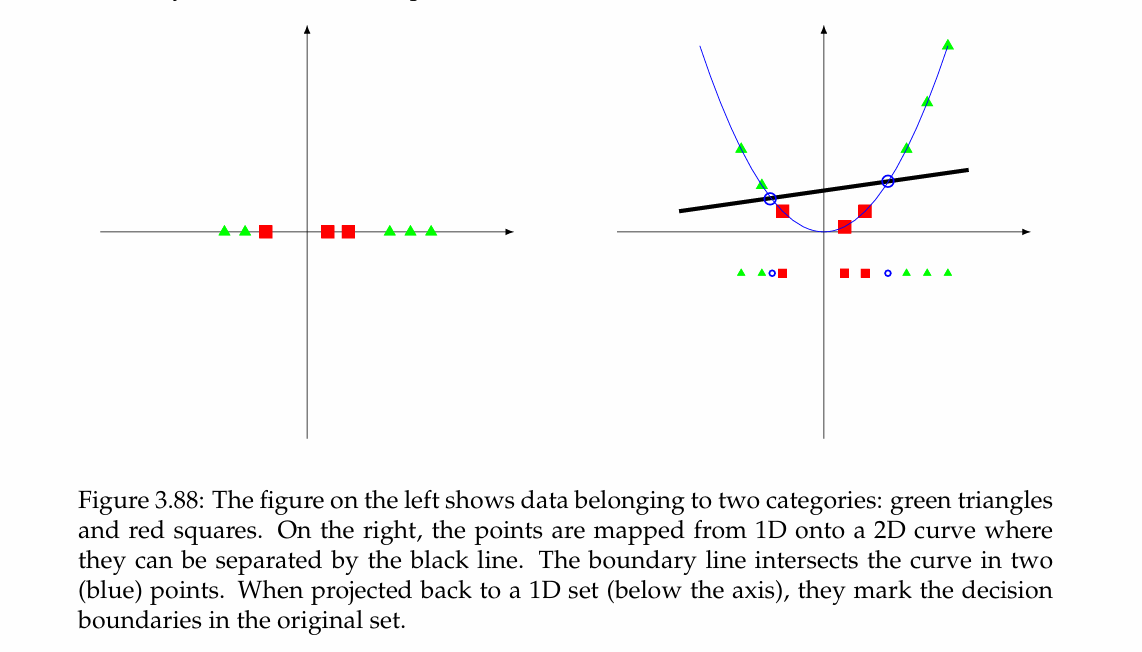

La idea es que cada punto $x^{(i)}, i=1,2, \cdots, m$ se puede mover a una **dimension superior**. Por ejemplo de $\mathbb{R}$ a $\mathbb{R}^2$. En la Figura 3.88 el truco es moverlos a una parabola $(x^{(i)}, (x^{(i)})^2) $.
En $\mathbb{R}^2$ los puntos son **linealmente separables**. En la figura el hiperplano es la linea negra. El hiperplano (se encuentra con el SVM tradicional, lineal) intersecta la parabola en los puntos (circulos azules). Estos se proyectan al espacio $\mathbb{R}$, eliminando la segunda coordenada.
Es decir tomando las abscisas.

Que pasa si todos los puntos est'an a un lado del eje $y$.
Veamos el caso en la Figura 3.91


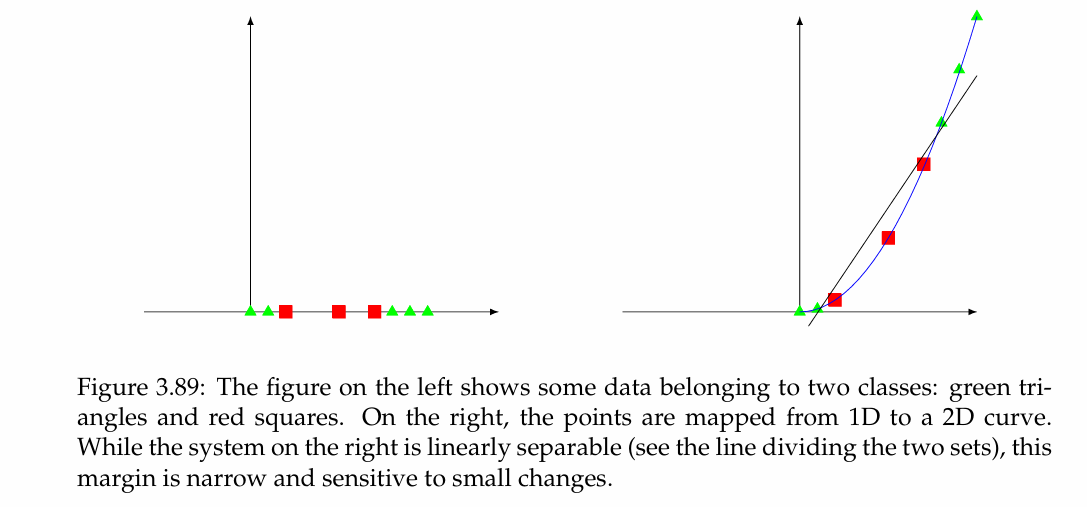

En el caso de la Figura 3.89, el margen de ancho de bando se reduce mucho. La idea es:

* Calcular la media de los puntos $\mu= \frac1m \sum_{i=1}^m x^{(i)}$

* Restar a cada punto su media $x \to x-\mu$

* Resolver el problema anterior sobre los puntos corridos.

* Proyectar la intersecci'on del hiperplano con la hipersuperficie al plano original

* **Sumarle la media** $(+ \mu)$ a cada punto.

## Ejemplo en dimensiones superiores
La Figura 3.90 ilustra el caso de un conjunto de puntos que **no son linealmente separables** en $\mathbb{R}^2$


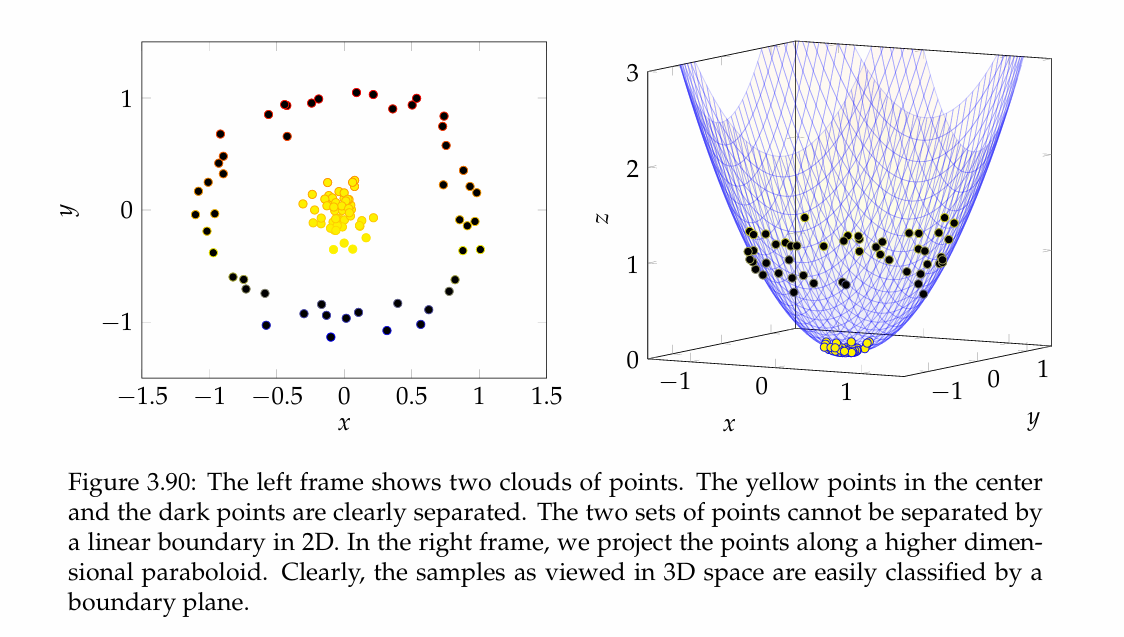

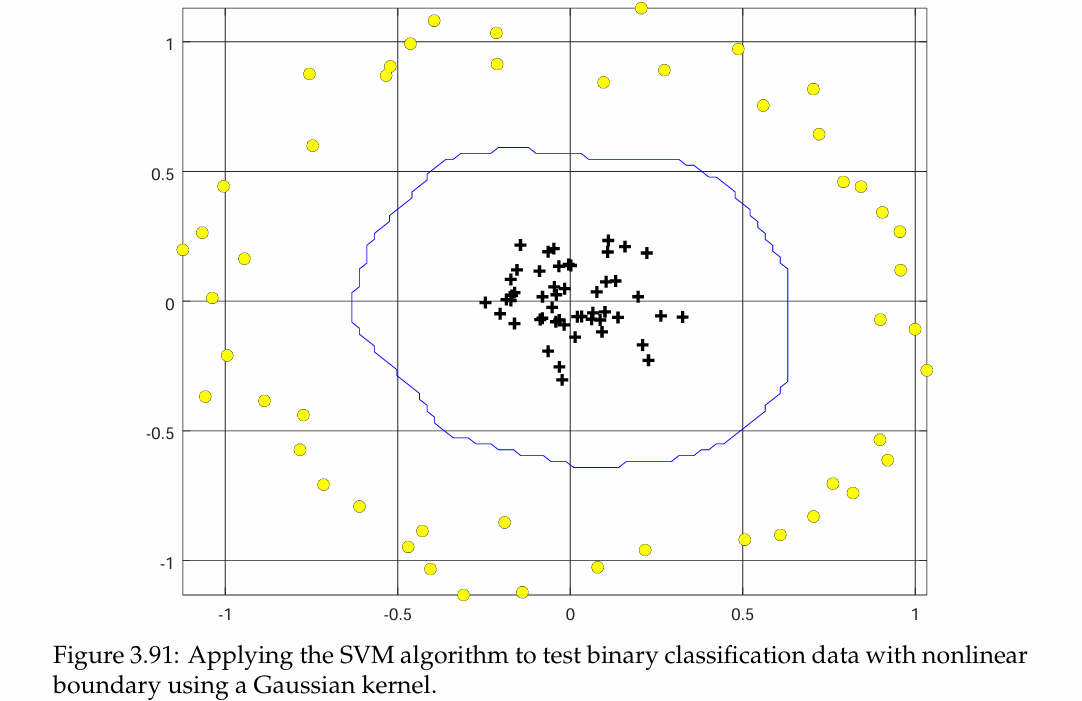

En el ejemplo de la Figura 3.91. Los puntos
$(x_1^{(i)}, x_2^{(i)})$
se backproject (proyectar hacia atras) a
$(x_1^{(i)}, x_2^{(i)}, \exp(-({x_1^{(i)}}^2 + {x_2^{(i)}}^2 ))$

Luego de normalizar por la media (restar la media). Se halla el hiperplano, se halla la interseccion del hiperplano con esta campana de Gauss, se proyecta al espacio original, y se le suma la media.

## Proxima Clase: Multiplicadores de Lagrange: Problema dual.